In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
import warnings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## **Read the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/My Drive/mbti_1.csv
data=pd.read_csv('/content/drive/My Drive/mbti_1.csv')
data.head()
#data.posts[1]


Mounted at /content/drive


type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [ ]:
data.posts[1]

"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f9da

In [ ]:
data['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:
data.describe(include='O')

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

## Data Cleaning

In [ ]:
def data_cleaning(data):
    data_length=[]
    cleaned_text=[]

    for sentence in tqdm(data.posts):
        sentence=sentence.lower()

        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
        sentence=re.sub('[^0-9a-z]',' ',sentence)

        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)

    return cleaned_text,data_length


In [ ]:
data.posts,data_length=data_cleaning(data)

100%|██████████| 8675/8675 [00:07<00:00, 1164.30it/s]


In [ ]:
data.head()

type                                              posts
0  INFJ     and intj moments     sportscenter not top t...
1  ENTP   i m finding the lack of me in these posts ver...
2  INTP   good one            course  to which i say i ...
3  INTJ   dear intp    i enjoyed our conversation the o...
4  ENTJ   you re fired    that s another silly misconce...

# we can see that symbols and websites have been removed from the original data set

In [ ]:
px.pie(data,names='type',title='Personality type')

# Next step we need to do the Tokenizing and Lemmatizing


In [ ]:
def tokenization_and_lemmatization(data):
  tokenized_and_lemmatized_text = []
  lemmatizer=WordNetLemmatizer()
  stop_words = set(stopwords.words('english')) # Load stop words
  for sentence in tqdm(data.posts):
    sentence = " ".join([word for word in sentence.split() if word not in stop_words])
    sentence = lemmatizer.lemmatize(sentence) # Lemmatize words
  tokenized_and_lemmatized_text.append(sentence)
  return tokenized_and_lemmatized_text


In [ ]:
data.post = tokenization_and_lemmatization(data)

100%|██████████| 8675/8675 [00:05<00:00, 1685.66it/s]
<ipython-input-12-969e21c17795>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
data.post[0]

'long since personalitycafe although seem changed one bit must say good back somewhere like usually turn doctor world around one dream chased large shadowy creature someone else felt save else dream ended reached safety happened well avatar doctor clockwork creature always liked monster worker trying job kind 3 1st thanks reply appreciate help get 2nd think everyone right opinion however many people abuse right p yea iron man thing xd thanks advice everyone thanks think needed humour might show maybe know anything harsh like throw beat although places go really really know judge personality types say mums introverted dad extroverted p ok understand want feel liking men good problem tell parents want tell really know say contempt always suppose spent afternoon buried book world spending morning animals suppose good mix whats hardest thing going face life got clue current perspective telling parents gay seems like huge hurdle suspect seem mi6 torchwood oh fictional oh well still got book

In [ ]:
data.head()

type                                              posts
0  INFJ     and intj moments     sportscenter not top t...
1  ENTP   i m finding the lack of me in these posts ver...
2  INTP   good one            course  to which i say i ...
3  INTJ   dear intp    i enjoyed our conversation the o...
4  ENTJ   you re fired    that s another silly misconce...

In [ ]:
def wordcloud_for_each_class(data):
    types=data.type.unique()
    for type_ in types:
        text= data[data['type']==type_].posts
        text=" ".join(text)
        wordcloud=WordCloud(background_color='white',width=1000,height=1000).generate(text)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(type_)
        plt.show()

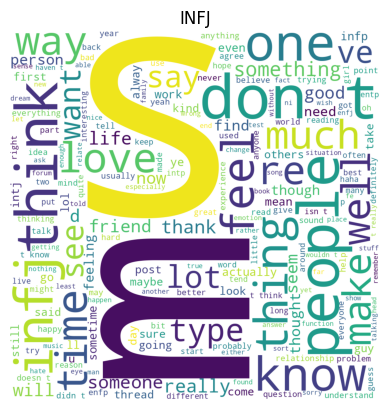

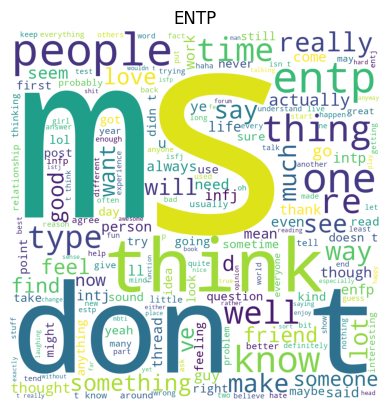

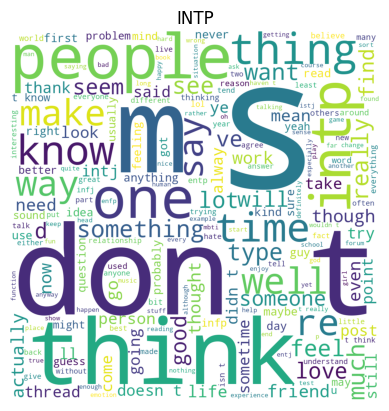

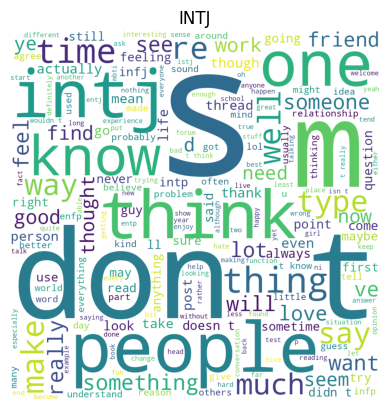

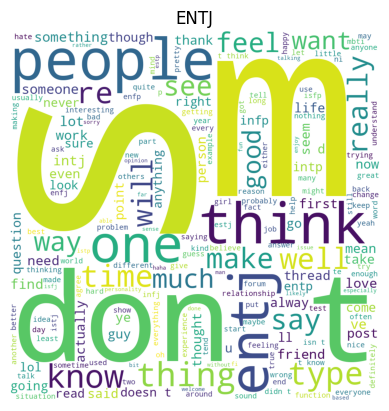

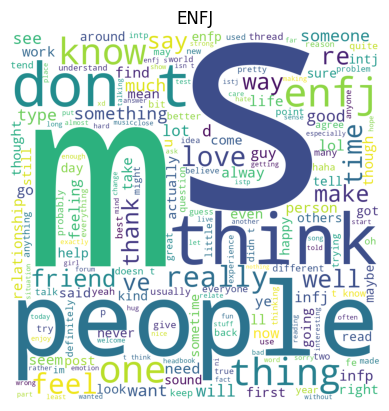

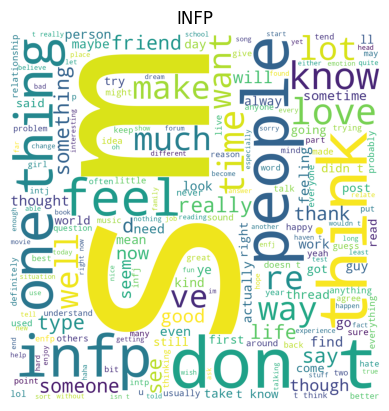

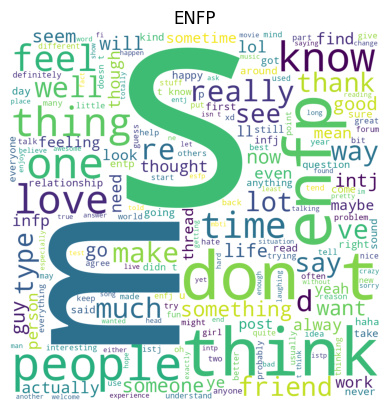

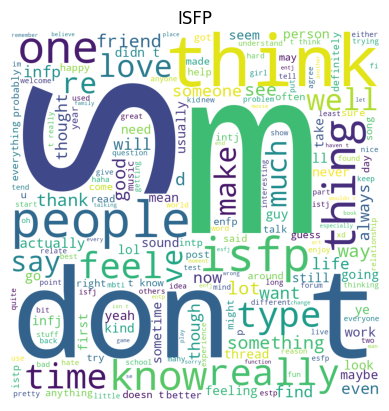

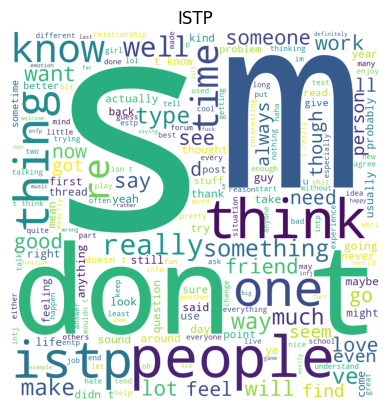

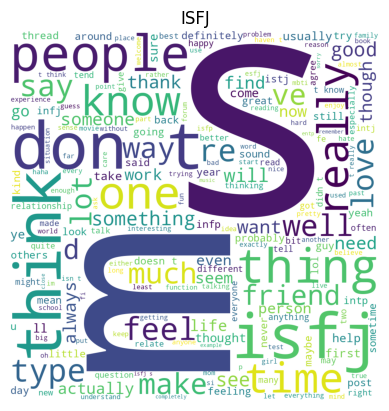

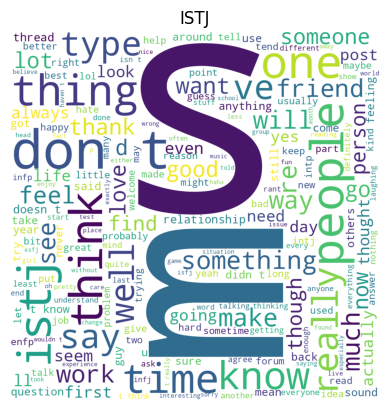

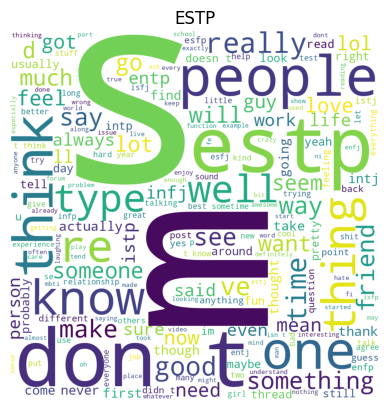

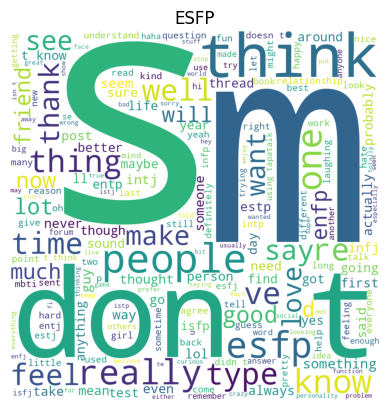

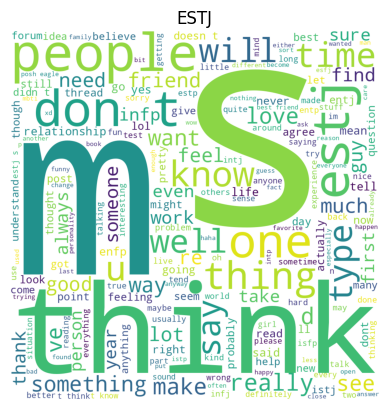

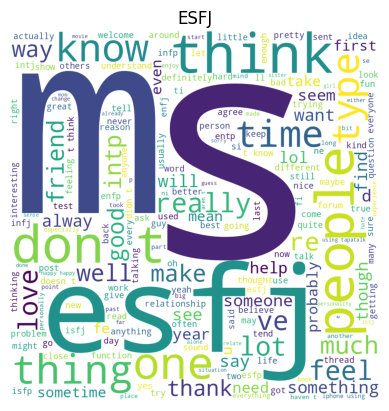

In [ ]:
wordcloud_for_each_class(data)

We find that there are letters and words like "m", "s" and "ve", which are generated from the abbreviation phrases after being tokenized. These words are not providing any useful information and should be removed. Also, we think that the names of the mbti types themselves should also be removed.

In [ ]:
def delete_unuseful_words(data):
  deleted_text = []
  pers_types = [' INFP ' ,' INFJ ', ' INTP ', ' INTJ ', ' ENTP ', ' ENFP ', ' ISTP ' ,' ISFP ' ,' ENTJ ', ' ISTJ ', ' ENFJ ', ' ISFJ ' ,' ESTP ', ' ESFP ' ,' ESFJ ' ,' ESTJ ']
  pers_types = [p.lower() for p in pers_types]
  abbrev_words = [' don ', ' t ', ' s ', ' m ', ' ve ', ' ll ', ' d ', ' u ', ' doesn ', ' won ', ' didn ', ' isn ']
  delete_words = pers_types + abbrev_words
  for sentence in tqdm(data.posts):
    for p in delete_words:
      sentence = re.sub(p, '', sentence)
    deleted_text.append(sentence)
  return deleted_text


In [ ]:
data.posts = delete_unuseful_words(data)

100%|██████████| 8675/8675 [00:05<00:00, 1450.33it/s]


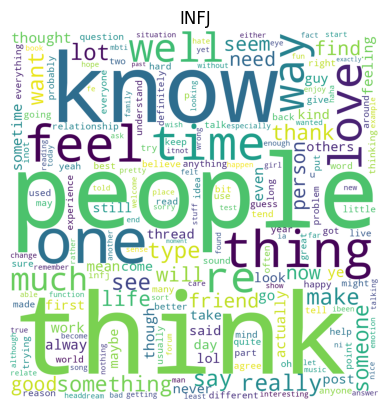

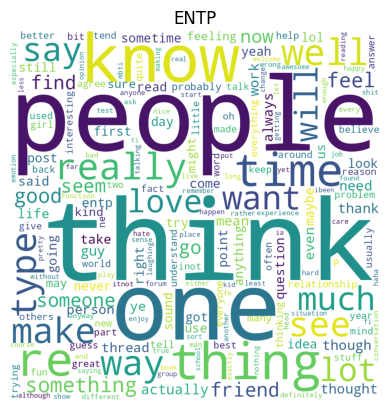

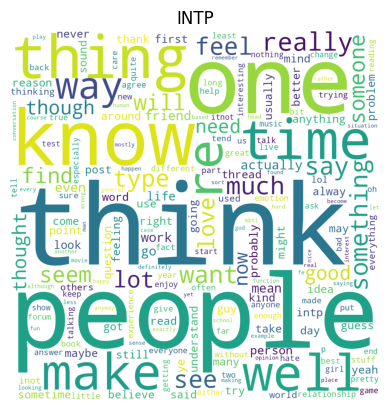

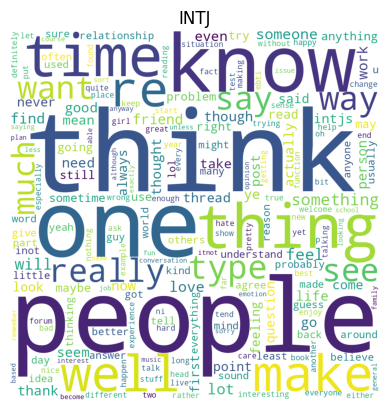

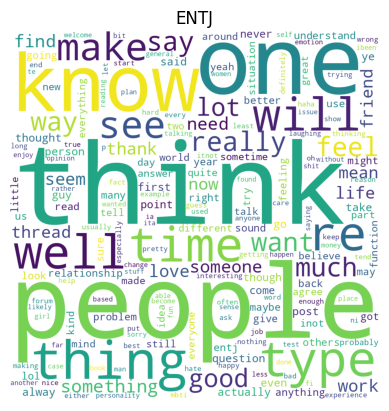

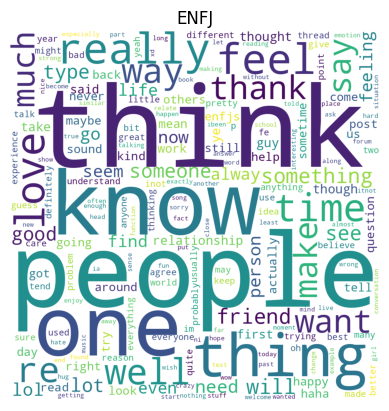

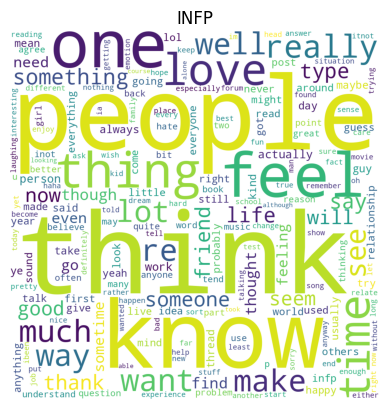

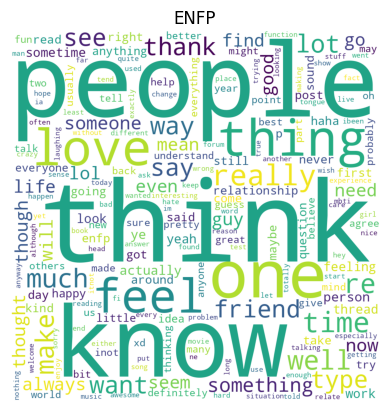

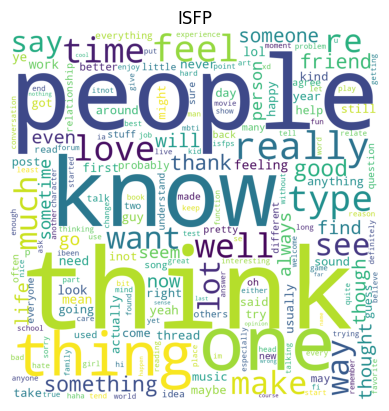

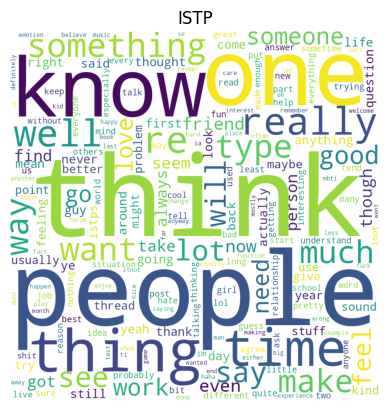

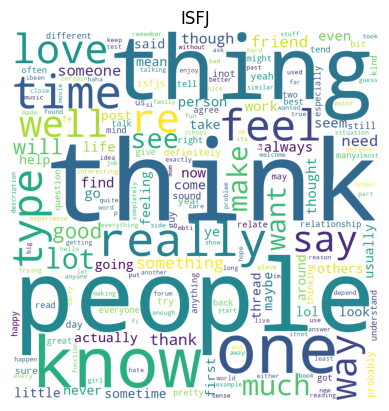

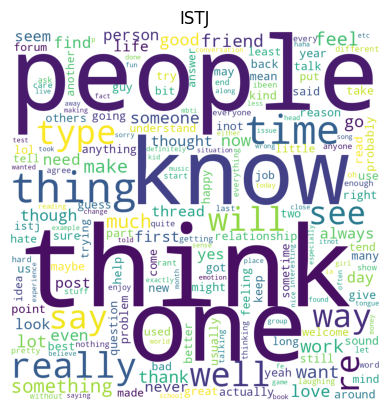

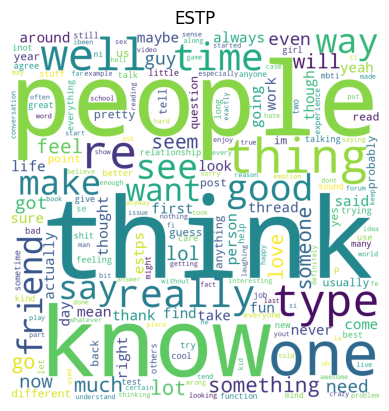

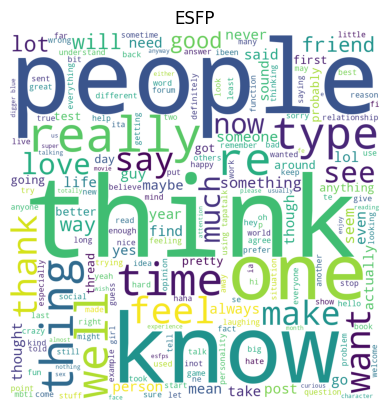

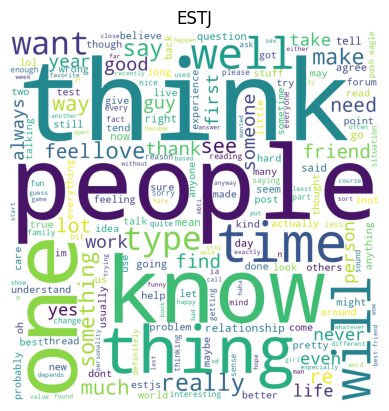

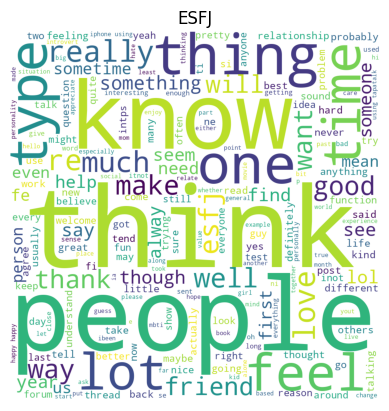

In [ ]:
wordcloud_for_each_class(data)

# And then the data cleaning is finished, we need to train the data in different ways and find the best one.

# Model training

In [ ]:
def split(dataframe, size):
    #Splitting into train & test
    X_train, X_test, y_train, y_test = train_test_split(dataframe['posts'], dataframe['type'], test_size=size, random_state=42)
    #Applying Tfidf Vectorization
    vectorizer = TfidfVectorizer(max_features=5000,stop_words='english')
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()
    #Label Encoding the classes as 0,1,2,3......
    target_encoder = LabelEncoder()
    y_train = target_encoder.fit_transform(y_train)
    y_test = target_encoder.transform(y_test)
    return X_train, X_test, y_train, y_test

In [ ]:
def oversampling(X_train, y_train):
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    return X_train, y_train

In [ ]:
# from gensim.models import Word2Vec

# def split2(dataframe, size):
#     # Splitting into train & test
#     X_train, X_test, y_train, y_test = train_test_split(dataframe['posts'], dataframe['type'], test_size=size, random_state=42)

#     # Tokenizing posts
#     tokenized_posts = [post.split() for post in X_train]

#     # Training Word2Vec model
#     w2v_model = Word2Vec(tokenized_posts, size=100, window=5, min_count=5, workers=4)

#     # Converting words to vectors
#     X_train = []
#     for post in tokenized_posts:
#         post_vec = []
#         for word in post:
#             try:
#                 post_vec.append(w2v_model.wv[word])
#             except KeyError:
#                 pass
#         X_train.append(post_vec)

#     # Padding sequences
#     max_seq_len = max([len(post) for post in X_train])
#     X_train = pad_sequences(X_train, maxlen=max_seq_len, padding='post', dtype='float32')

#     # Converting test set
#     tokenized_test_posts = [post.split() for post in X_test]
#     X_test = []
#     for post in tokenized_test_posts:
#         post_vec = []
#         for word in post:
#             try:
#                 post_vec.append(w2v_model.wv[word])
#             except KeyError:
#                 pass
#         X_test.append(post_vec)
#     X_test = pad_sequences(X_test, maxlen=max_seq_len, padding='post', dtype='float32')

#     # Label Encoding the classes as 0, 1, 2, 3...
#     target_encoder = LabelEncoder()
#     y_train = target_encoder.fit_transform(y_train)
#     y_test = target_encoder.transform(y_test)

#     return X_train, X_test, y_train, y_test


In [ ]:
def knn_model(X_train, X_test, y_train, y_test):
    neigh = KNeighborsClassifier()
    neigh.fit(X_train, y_train)
    y_predict = neigh.predict(X_test)
    return y_predict

def logistic_model(X_train, X_test, y_train, y_test):
    model_log = LogisticRegression(max_iter=3000, C=0.5, n_jobs=-1)
    model_log.fit(X_train, y_train)
    y_predict = model_log.predict(X_test)
    return y_predict

def naive_bayes_model(X_train, X_test, y_train, y_test):
    model_nb = MultinomialNB()
    model_nb.fit(X_train, y_train)
    y_predict = model_nb.predict(X_test)
    return y_predict


from sklearn import svm

def svm_model(X_train, X_test, y_train, y_test):
    model_linear_SVC = LinearSVC(C=0.15)
    model_linear_SVC.fit(X_train, y_train)
    y_predict = model_linear_SVC.predict(X_test)
    return y_predict

from sklearn.model_selection import cross_val_score

def svm_model2(X_train, X_test, y_train, y_test):
    model_linear_SVC = LinearSVC()
    c_values = [0.01, 0.2, 0.15, 0.25, 0.24, 0.27]  # 可选的C值
    cv_scores = []
    for c in c_values:
        model_linear_SVC.set_params(C=c)
        scores = cross_val_score(model_linear_SVC, X_train, y_train, cv=5)  # 5折交叉验证
        cv_scores.append(scores.mean())

    best_c = c_values[np.argmax(cv_scores)]
    print("Best C value: ", best_c)
    model_linear_SVC.set_params(C=best_c)
    model_linear_SVC.fit(X_train, y_train)
    y_predict = model_linear_SVC.predict(X_test)
    return y_predict


def decision_tree_model(X_train, X_test, y_train, y_test):
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
    dt_classifier.fit(X_train, y_train)
    y_predict = dt_classifier.predict(X_test)
    return y_predict

def random_forest_model(X_train, X_test, y_train, y_test):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
    rf_classifier.fit(X_train, y_train)
    y_predict = rf_classifier.predict(X_test)
    return y_predict

from sklearn.ensemble import AdaBoostClassifier
def adaboost_model(X_train, X_test, y_train, y_test, n_estimators=100, learning_rate=1):
    adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    adaboost_classifier.fit(X_train, y_train)
    y_predict = adaboost_classifier.predict(X_test)
    return y_predict

# from sklearn.ensemble import GradientBoostingClassifier
# def gradient_boosting_model(X_train, X_test, y_train, y_test):
#     gb_classifier = GradientBoostingClassifier()
#     gb_classifier.fit(X_train, y_train)
#     y_predict = gb_classifier.predict(X_test)
#     return y_predict

def xgb(X_train, X_test, y_train, y_test):
    print("xgb")
    model_xgb=XGBClassifier(gpu_id=0, tree_method='gpu_hist', max_depth=5, n_estimators=50, learning_rate=0.1)
    model_xgb.fit(X_train, y_train)
    y_predict = model_xgb.predict(X_test)
    return y_predict


from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Dropout
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np


def FCNN(X_train, X_test, y_train, y_test):
    print("FCNN")
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(16, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)
    y_predict = model.predict(X_test)
    y_predict = np.argmax(y_predict, axis=1)
    return y_predict



def FCNN2(X_train, X_test, y_train, y_test):
    print("FCNN")
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(16, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=48, verbose=1)
    y_predict = model.predict(X_test)
    y_predict = np.argmax(y_predict, axis=1)
    return y_predict





# def rnn_model(X_train, X_test, y_train, y_test):
#     #RNN model
#     print("RNN")
#     model_rnn = Sequential()
#     model_rnn.add(Embedding(5000, 32, input_length=X_train.shape[1]))
#     model_rnn.add(LSTM(100))
#     model_rnn.add(Dense(24, activation='softmax'))
#     model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     model_rnn.fit(X_train, y_train, epochs=5, batch_size=64)
#     y_pred_rnn = model_rnn.predict(X_test)
#     y_pred_rnn = np.argmax(y_pred_rnn, axis=1)

#     return y_pred_rnn


In [ ]:
X_train2, X_test2, y_train2, y_test2 = split(data, 0.2)

In [ ]:
def plot_bar(y_train2):
    unique, counts = np.unique(y_train2, return_counts=True)
    plt.bar(unique, height = counts, tick_label = unique)
    plt.show()

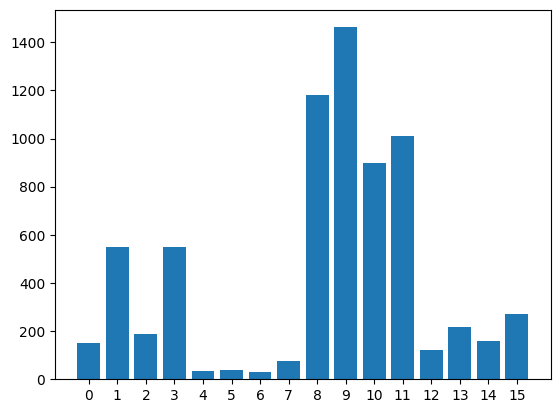

In [ ]:
plot_bar(y_train2)

Text(0.5, 1.0, 'Total post each personality type')

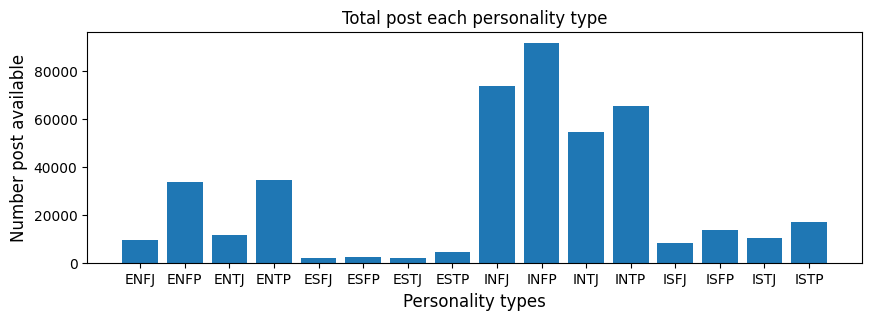

In [ ]:
total = data.groupby(['type']).count()*50
plt.figure(figsize = (10,3))
plt.bar(np.array(total.index), height =total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')

In [ ]:
X_train2, y_train2 = oversampling(X_train2, y_train2)

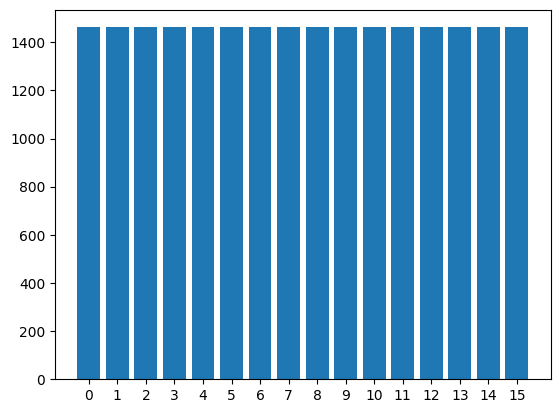

In [ ]:
plot_bar(y_train2)

In [ ]:
X_train2[0]

array([0., 0., 0., ..., 0., 0., 0.])

KNN

In [ ]:
y_pred_knn = knn_model(X_train2, X_test2, y_train2, y_test2)

Logistic Regression

In [ ]:
y_pred_logis = logistic_model(X_train2, X_test2, y_train2, y_test2)

Naive Bayes

In [ ]:
y_pred_naive_bayes = naive_bayes_model(X_train2, X_test2, y_train2, y_test2)

SVM

In [ ]:
y_pred_svm = svm_model(X_train2, X_test2, y_train2, y_test2)

Decision Tree

In [ ]:
y_pred_dt = decision_tree_model(X_train2, X_test2, y_train2, y_test2)

Random Forest

In [ ]:
y_pred_rf = random_forest_model(X_train2, X_test2, y_train2, y_test2)

In [ ]:
y_pred_rf

array([ 8,  8, 11, ...,  9, 10, 11])

Adaboost

In [ ]:
y_pred_adab = adaboost_model(X_train2, X_test2, y_train2, y_test2)

In [ ]:
y_pred_adab

array([ 8,  8,  8, ...,  8, 10,  9])

RNN

In [ ]:
#y_pred_rnn = rnn_model(X_train2, X_test2, y_train2, y_test2)

In [ ]:
#y_pred_rnn

In [ ]:
y_pred_FCNN = FCNN(X_train2, X_test2, y_train2, y_test2)

FCNN
Epoch 1/10
366/366 [==============================] - 7s 4ms/step - loss: 0.8166 - accuracy: 0.7740
Epoch 2/10
366/366 [==============================] - 1s 3ms/step - loss: 0.1492 - accuracy: 0.9544
Epoch 3/10
366/366 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9894
Epoch 4/10
366/366 [==============================] - 1s 4ms/step - loss: 0.0105 - accuracy: 0.9987
Epoch 5/10
366/366 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.9999
Epoch 6/10
366/366 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/10
366/366 [==============================] - 1s 3ms/step - loss: 6.6562e-04 - accuracy: 1.0000
Epoch 8/10
366/366 [==============================] - 1s 4ms/step - loss: 4.6656e-04 - accuracy: 1.0000
Epoch 9/10
366/366 [==============================] - 1s 4ms/step - loss: 3.3670e-04 - accuracy: 1.0000
Epoch 10/10
55/55 [==============================] - 0s 2ms/step


In [ ]:
y_pred_FCNN2 = FCNN2(X_train2, X_test2, y_train2, y_test2)

In [ ]:
#y_pred_FCNN3 = FCNN3(X_train2, X_test2, y_train2, y_test2)

In [ ]:
y_pred_FCNN

array([ 3,  3, 11, ...,  9, 14, 11])

XGBoost

In [ ]:
y_pred_xgboost = xgb(X_train2, X_test2, y_train2, y_test2)

xgb


#Function for Running All the Modules

In [ ]:
def model(X_train2, X_test2, y_train2, y_test2):
    y_preds = {}

    #KNN
    y_preds['KNN'] = knn_model(X_train2, X_test2, y_train2, y_test2)
    #Logistic Regression
    y_preds['Logistic Regression'] = logistic_model(X_train2, X_test2, y_train2, y_test2)
    #Naive Bayes
    # y_preds['Naive Bayes']= naive_bayes_model(X_train2, X_test2, y_train2, y_test2)
    #SVM
    y_preds['SVM'] = svm_model(X_train2, X_test2, y_train2, y_test2)
    #SVM2
    y_preds['SVM2'] = svm_model2(X_train2, X_test2, y_train2, y_test2)
    #Decision Tree
    y_preds['Decision Tree'] = decision_tree_model(X_train2, X_test2, y_train2, y_test2)
    #Random Forest
    y_preds['Random Forest'] = random_forest_model(X_train2, X_test2, y_train2, y_test2)
    #AdaBoost
    y_preds['AdaBoost'] = adaboost_model(X_train2, X_test2, y_train2, y_test2)
    y_preds['XGBoost'] = xgb(X_train2, X_test2, y_train2, y_test2)
    #FCNN
    y_preds['FCNN'] = FCNN(X_train2, X_test2, y_train2, y_test2)
    FCNN
    y_preds['FCNN2'] = FCNN2(X_train2, X_test2, y_train2, y_test2)
    #rnn
    #y_preds['RNN'] = rnn_model(X_train2, X_test2, y_train2, y_test2)

    return y_preds

In [ ]:
def evaluate(y_test, models):
  models_accuracy={}
  report = {}
  f1_scores={}
  for model, y_pred in models.items():
    models_accuracy[model]=accuracy_score(y_test, y_pred)
    f1_scores[model]=f1_score(y_test, y_pred, average='macro')
    report[model] = classification_report(y_test, y_pred ,zero_division=0)

  accuracy_under=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])
  f1_under=pd.DataFrame(f1_scores.items(),columns=['Models','Test F1 Score'])

  return accuracy_under, report, f1_under

In [ ]:
model_accuracy_orig2, report_orig2, f1_orig2 = evaluate(y_test2, model(X_train2, X_test2, y_train2, y_test2))
model_accuracy_orig2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')
#odel_accuracy_orig2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

Best C value:  0.24
xgb
FCNN
Epoch 1/10
109/109 [==============================] - 2s 5ms/step - loss: 2.1435 - accuracy: 0.2805
Epoch 2/10
109/109 [==============================] - 1s 5ms/step - loss: 1.4546 - accuracy: 0.5512
Epoch 3/10
109/109 [==============================] - 0s 4ms/step - loss: 0.8051 - accuracy: 0.7664
Epoch 4/10
109/109 [==============================] - 0s 4ms/step - loss: 0.3350 - accuracy: 0.9239
Epoch 5/10
109/109 [==============================] - 0s 4ms/step - loss: 0.1073 - accuracy: 0.9850
Epoch 6/10
109/109 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9986
Epoch 7/10
109/109 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 0.9997
Epoch 8/10
109/109 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 9/10
109/109 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 10/10
55/55 [==============================] - 0s 2ms/step
FCNN
E

In [ ]:
f1_orig2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
report_orig2

{'KNN': '              precision    recall  f1-score   support\n\n           0       0.11      0.15      0.12        41\n           1       0.20      0.35      0.25       125\n           2       0.22      0.05      0.08        44\n           3       0.23      0.10      0.14       135\n           4       0.08      0.14      0.11         7\n           5       0.00      0.00      0.00         8\n           6       0.00      0.00      0.00         7\n           7       0.33      0.07      0.11        15\n           8       0.21      0.25      0.23       288\n           9       0.28      0.66      0.39       370\n          10       0.24      0.06      0.10       193\n          11       0.61      0.14      0.23       293\n          12       0.40      0.13      0.20        45\n          13       0.00      0.00      0.00        53\n          14       0.75      0.07      0.12        44\n          15       0.00      0.00      0.00        67\n\n    accuracy                           0.26      173

# The 16 type is not very acc so we will try 4 types

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/My Drive/mbti_1.csv
data=pd.read_csv('/content/drive/My Drive/mbti_1.csv')
data.head()
#data.posts[1]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [ ]:
data2 = data.replace(['INTJ', 'INTP', 'ENTJ', 'ENTP' ], 'NT')
data2 = data2.replace(['INFJ', 'INFP', 'ENFJ', 'ENFP'], 'NF')
data2 = data2.replace(['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ'], 'SJ')
data2 = data2.replace(['ISTP', 'ISFP', 'ESTP', 'ESFP'], 'SP')

data2.head()


type                                              posts
0   NF  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1   NT  'I'm finding the lack of me in these posts ver...
2   NT  'Good one  _____   https://www.youtube.com/wat...
3   NT  'Dear INTP,   I enjoyed our conversation the o...
4   NT  'You're fired.|||That's another silly misconce...

In [ ]:
data2['type'].value_counts()

NF    4167
NT    3311
SP     745
SJ     452
Name: type, dtype: int64

In [ ]:
data2.describe(include='O')

type                                              posts
count   8675                                               8675
unique     4                                               8675
top       NF  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    4167                                                  1

In [ ]:
data2.posts,data2_length=data_cleaning(data2)

100%|██████████| 8675/8675 [00:04<00:00, 1945.28it/s]


In [ ]:
px.pie(data2,names='type',title='Personality type')

In [ ]:
data2.post = tokenization_and_lemmatization(data2)

100%|██████████| 8675/8675 [00:02<00:00, 3112.87it/s]
<ipython-input-18-aede78bbacd7>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
def split2(dataframe, size):
    #Splitting into train & test
    X_train, X_test, y_train, y_test = train_test_split(dataframe['posts'], dataframe['type'], test_size=size, random_state=42)
    #Applying Tfidf Vectorization
    vectorizer = TfidfVectorizer(max_features=5000,stop_words='english')
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()
    #Label Encoding the classes as 0,1,2,3......
    target_encoder = LabelEncoder()
    y_train = target_encoder.fit_transform(y_train)
    y_test = target_encoder.transform(y_test)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train3, X_test3, y_train3, y_test3 = split(data2, 0.2)

In [ ]:
model_accuracy_orig2, report_orig2, f1_orig2 = evaluate(y_test3, model(X_train3, X_test3, y_train3, y_test3))
model_accuracy_orig2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

Best C value:  0.27
xgb
FCNN
Epoch 1/10
109/109 [==============================] - 6s 3ms/step - loss: 1.0088 - accuracy: 0.6408
Epoch 2/10
109/109 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.8255
Epoch 3/10
109/109 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9256
Epoch 4/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.9788
Epoch 5/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9957
Epoch 6/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9996
Epoch 7/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9997
Epoch 8/10
109/109 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/10
109/109 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
55/55 [==============================] - 0s 2ms/step
FCNN
E

In [ ]:
f1_orig2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

In [ ]:
report_orig2

{'KNN': '              precision    recall  f1-score   support\n\n           0       0.56      0.97      0.71       824\n           1       0.83      0.32      0.46       665\n           2       0.69      0.21      0.33       103\n           3       0.75      0.10      0.18       143\n\n    accuracy                           0.60      1735\n   macro avg       0.71      0.40      0.42      1735\nweighted avg       0.69      0.60      0.55      1735\n',
 'Logistic Regression': '              precision    recall  f1-score   support\n\n           0       0.77      0.88      0.82       824\n           1       0.76      0.84      0.79       665\n           2       0.93      0.14      0.24       103\n           3       0.78      0.22      0.35       143\n\n    accuracy                           0.77      1735\n   macro avg       0.81      0.52      0.55      1735\nweighted avg       0.78      0.77      0.74      1735\n',
 'SVM': '              precision    recall  f1-score   support\n\n      